In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [2]:
ops.reset_default_graph()

In [3]:
iris = datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

In [6]:
y_vals

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [7]:
sess = tf.Session()

In [8]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [9]:
train_indices = np.random.choice(len(x_vals),
                                 round(len(x_vals)*0.8),
                                 replace = True)

In [10]:
train_indices

array([ 15,  72,  22,  43,  75, 104,   7,  95,  75,  47,  63,  31, 148,
       124, 116,  37, 102,   4, 107,  51, 103,  38,  33,  58, 124,  67,
        69,  88,  46,  95, 121,  31,  80,  52,  50, 132,  63,  49,  39,
       136,  15, 136, 145, 117,  73, 105, 110,  83,  96,  43,  32,  26,
       136,  76, 138,  40,  34,  60, 137,  70,  86,  19,  56, 129,  68,
        81,  61, 125,  97, 146,  87,  43,  52,  16,  55, 123, 149,  43,
        70,  59,  17, 143,  26,  39,  63, 148, 100,  27,   0,  62,  92,
        36,  63,  75, 110,  50, 135,  82, 129,  49,  40, 108,  46,  73,
        78, 110,  95,  32, 119,  16, 149,  58,  21,  92,  51,  97,   8,
       107,  86,  88])

In [11]:
test_indices = np.array(list(set(range(len(x_vals)))-set(train_indices)))

In [12]:
test_indices

array([128,   1,   2,   3, 130,   5,   6, 131, 133,   9,  10,  11,  12,
        13,  14, 134, 139, 140,  18, 141,  20, 142, 144,  23,  24,  25,
       147,  28,  29,  30,  35,  41,  42,  44,  45,  48,  53,  54,  57,
        64,  65,  66,  71,  74,  77,  79,  84,  85,  89,  90,  91,  93,
        94,  98,  99, 101, 106, 109, 111, 112, 113, 114, 115, 118, 120,
       122, 126, 127])

In [13]:
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [14]:
def normalize_cols(m):
    col_max = m.max(axis = 0)
    col_min = m.min(axis = 0)
    
    return (m-col_min) / (col_max-col_min)
    

In [15]:
x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [16]:
batch_size = 50

x_data = tf.placeholder(shape=[None,3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)

In [17]:
hidden_layer_nodes = 10

A1 = tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))
loss = tf.reduce_mean(tf.square(y_target - final_output))

In [19]:
my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)

In [20]:
init = tf.global_variables_initializer()
sess.run(init)

In [21]:
loss_vec = []
test_loss = []
for i in range(500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%50==0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))

Generation: 50. Loss = 0.29835793
Generation: 100. Loss = 0.17705244
Generation: 150. Loss = 0.12582134
Generation: 200. Loss = 0.14436379
Generation: 250. Loss = 0.12294821
Generation: 300. Loss = 0.11740762
Generation: 350. Loss = 0.09133857
Generation: 400. Loss = 0.13619652
Generation: 450. Loss = 0.13953
Generation: 500. Loss = 0.10495745


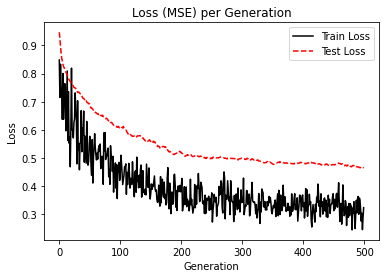

In [22]:
%matplotlib inline
# Plot loss (MSE) over time
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.legend(loc='upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()